# EPIC 4 - Become a Carer - T31.1 - Carer Status, Geographic Location, Sex, Age
This Jupyter Notebook is about preparing 'Number of primary carers, by age and sex, 2018' CSV file for being used in Mo-Buddy Website Solution.
1. Read Raw Data
2. Clean Raw Data
3. Export Clean Data

- Table_29.1 - Carer status by sex, age
- Table_30.1 - Carer status, recipient, disability status, age, sex
- Table_31.1 - Carer status, by geographic location, age, sex
- Table_32.1 - 15-.. yo, carer status, sex 
- Table_33.1 - Employed 15-64 yo, carer status, sex 
- Table_34.1 - Primary Carer, recipient, age, sex
- Table_35.1 - Carer and recipient living in or other households, age
- Table_36.1 - Primary Carer, Time spending in care, sex  ****
- Table_37.1 - Primary Carer, age, time spending in care, disability status, ***** 
- Table_38.1 - Primary Carer, time spending in care, select recipint   ****
- Table_39.1 - Primary Carer, reason for taking a carer, sex   ****
- Table_40.1 - Primary Carer, reason for taking a carer, age of recipient ****
- Table_41.1 - Primary Carer, satisfaction of service recieved, sex, age  ****
- Table_42.1 - Primary Carer, social community participation with recipient, time spending in car, age  ****
- Table_43.1 - Primary Carer, social community participation without recipient, time spending in car, age  ****

In [1]:
# Import Packages
import pandas as pd
import itertools
# import re

In [2]:
# Set option to display all columns
pd.set_option('display.max_columns', None)

## 1. Read in Raw Data from a CSV file

In [3]:
# Function for reading in raw data from a XLS file
def read_in_data(file_path, sheet_name):
    """
    Function for reading in raw data from XLS file.
    Inputs: 
        - file_path, type: string, desc: XLS file path
        - sheet_name, type: string, desc: Sheet Name
    Outputs:
        - raw_data, type: dataframe, desc: Raw data
    """

    raw_data = pd.read_excel(io=file_path, sheet_name=sheet_name)
    
    return raw_data

In [4]:
# Read in data
filepath_raw_data = 'DataBases/44300do030.xls'
sheet_name = 'Table_31.1'
df_raw_carer_31 = read_in_data(filepath_raw_data, sheet_name)

In [5]:
# Check how the dataframe looks like
df_raw_carer_31

,Australian Bureau of Statistics,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,"44300DO030_2018 Disability, Ageing and Carers,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Released at 11.30am (Canberra time) Thurs 24 O...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Table 31.1 All persons, living in households, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Persons aged 0-64 years,NaN,NaN,NaN,NaN,Persons aged 65 years and over,NaN,NaN,NaN,NaN,All persons,NaN,NaN,NaN,NaN
4,NaN,Primary carer,"Carer, but not a primary carer",Total carers,Not a carer,Total,Primary carer,"Carer, but not a primary carer",Total carers,Not a carer,Total,Primary carer,"Carer, but not a primary carer",Total carers,Not a carer,Total
5,ESTIMATE ('000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Males,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,State or territory of usual residence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,New South Wales,47.6,212,258.1,3068.3,3324.3,25.1,76.8,100.5,483.2,580.6,69.4,287.4,357.2,3547,3907.4
9,Victoria,43.3,176.9,217.8,2516.8,2734.7,23.1,63.6,85.4,357.8,444,63.3,239.1,303.7,2875.4,3179.2


## 2. Clean up Raw Data

In [6]:
# Drop useless rows and columns
col_names = df_raw_carer_31.iloc[4,:]
df_carer_31 = df_raw_carer_31.copy()
df_carer_31.drop(labels=[0,1,2,5,16,22,33,39,50,56,57,58], axis=0, inplace=True)
df_carer_31.reset_index(drop=True, inplace=True)
df_carer_31.columns = col_names
df_carer_31.columns.names = ['']
df_carer_31

,NaN,Primary carer,"Carer, but not a primary carer",Total carers,Not a carer,Total,Primary carer,"Carer, but not a primary carer",Total carers,Not a carer,Total,Primary carer,"Carer, but not a primary carer",Total carers,Not a carer,Total
0,NaN,Persons aged 0-64 years,NaN,NaN,NaN,NaN,Persons aged 65 years and over,NaN,NaN,NaN,NaN,All persons,NaN,NaN,NaN,NaN
1,NaN,Primary carer,"Carer, but not a primary carer",Total carers,Not a carer,Total,Primary carer,"Carer, but not a primary carer",Total carers,Not a carer,Total,Primary carer,"Carer, but not a primary carer",Total carers,Not a carer,Total
2,Males,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,State or territory of usual residence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,New South Wales,47.6,212,258.1,3068.3,3324.3,25.1,76.8,100.5,483.2,580.6,69.4,287.4,357.2,3547,3907.4
5,Victoria,43.3,176.9,217.8,2516.8,2734.7,23.1,63.6,85.4,357.8,444,63.3,239.1,303.7,2875.4,3179.2
6,Queensland,33.1,122,154.7,1903.7,2058.4,19.5,46.6,65.6,288.3,355.2,54.5,165.3,220.7,2189.3,2414.3
7,South Australia,9.2,51.6,61.5,635.5,697,8.1,15,18.2,119.2,138.9,18.4,63.4,80.2,759.7,839.9
8,Western Australia,12.3,60.7,71.1,994.9,1066.5,6.6,22.3,29.4,142.1,171,18.9,81.2,101.1,1137.8,1238.1
9,Tasmania,3.5,22.3,26.8,181.6,210.4,5.3,7,12.4,35.9,48.2,10.1,29.3,38,219.1,257.4


In [7]:
# Reset index and prepare for adding multiindex (in column)
df_carer_31.rename(columns={df_carer_31.columns[0]:'Index'}, inplace=True)
df_carer_31.set_index(keys='Index', drop=True, inplace=True)
df_carer_31

,Primary carer,"Carer, but not a primary carer",Total carers,Not a carer,Total,Primary carer,"Carer, but not a primary carer",Total carers,Not a carer,Total,Primary carer,"Carer, but not a primary carer",Total carers,Not a carer,Total
Index,,,,,,,,,,,,,,,
NaN,Persons aged 0-64 years,NaN,NaN,NaN,NaN,Persons aged 65 years and over,NaN,NaN,NaN,NaN,All persons,NaN,NaN,NaN,NaN
NaN,Primary carer,"Carer, but not a primary carer",Total carers,Not a carer,Total,Primary carer,"Carer, but not a primary carer",Total carers,Not a carer,Total,Primary carer,"Carer, but not a primary carer",Total carers,Not a carer,Total
Males,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State or territory of usual residence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
New South Wales,47.6,212,258.1,3068.3,3324.3,25.1,76.8,100.5,483.2,580.6,69.4,287.4,357.2,3547,3907.4
Victoria,43.3,176.9,217.8,2516.8,2734.7,23.1,63.6,85.4,357.8,444,63.3,239.1,303.7,2875.4,3179.2
Queensland,33.1,122,154.7,1903.7,2058.4,19.5,46.6,65.6,288.3,355.2,54.5,165.3,220.7,2189.3,2414.3
South Australia,9.2,51.6,61.5,635.5,697,8.1,15,18.2,119.2,138.9,18.4,63.4,80.2,759.7,839.9
Western Australia,12.3,60.7,71.1,994.9,1066.5,6.6,22.3,29.4,142.1,171,18.9,81.2,101.1,1137.8,1238.1


In [8]:
# Adding multiIndex (in column)
first_level = ['Persons aged 0-64 years', 'Persons aged 65 years and over', 'All persons']
second_level = ['Primary carer', 'Carer, but not a primary carer', 'Total carers', 'Not a carer', 'Total']
levels = [first_level, second_level]
df_carer_31.columns = pd.MultiIndex.from_product(levels, names=["Age", "Status"])
df_carer_31.reset_index(inplace=True)
df_carer_31

Age                                     Index  Persons aged 0-64 years  \
Status                                                   Primary carer   
0                                         NaN  Persons aged 0-64 years   
1                                         NaN            Primary carer   
2                                       Males                      NaN   
3       State or territory of usual residence                      NaN   
4                             New South Wales                     47.6   
5                                    Victoria                     43.3   
6                                  Queensland                     33.1   
7                             South Australia                      9.2   
8                           Western Australia                     12.3   
9                                    Tasmania                      3.5   
10                         Northern Territory                      0.8   
11               Australian Capital Territory                      2.9   
12                                 Remoteness                      NaN   
13                               Major cities                    113.2   
14                             Inner regional                     29.2   
15                                      Other                     11.5   
16                                  Australia                    154.2   
17                                    Females                      NaN   
18      State or territory of usual residence                      NaN   
19                            New South Wales                    157.1   
20                                   Victoria                    122.4   
21                                 Queensland                    106.5   
22                            South Australia                     27.4   
23                          Western Australia                     38.4   
24                                   Tasmania                     12.1   
25                         Northern Territory                      2.9   
26               Australian Capital Territory                      9.5   
27                                 Remoteness                      NaN   
28                               Major cities                    329.1   
29                             Inner regional                    105.5   
30                                      Other                     41.5   
31                                  Australia                    478.7   
32                                All persons                      NaN   
33      State or territory of usual residence                      NaN   
34                            New South Wales                    203.2   
35                                   Victoria                    165.6   
36                                 Queensland                    142.1   
37                            South Australia                     37.3   
38                          Western Australia                     50.9   
39                                   Tasmania                     17.2   
40                         Northern Territory                      3.9   
41               Australian Capital Territory                     12.1   
42                                 Remoteness                      NaN   
43                               Major cities                    445.2   
44                             Inner regional                      133   
45                                      Other                     52.2   
46                                  Australia                    632.5   

Age                                                                         \
Status  Carer, but not a primary carer  Total carers  Not a carer    Total   
0                                  NaN           NaN          NaN      NaN   
1       Carer, but not a primary carer  Total carers  Not a carer    Total   
2                                  NaN           NaN         

In [9]:
# Dropping useless rows
df_carer_31_1 =df_carer_31.copy()
df_carer_31_1.drop(labels=[0,1,2,3,12,17,18,27,32,33,42] , axis=0, inplace=True)
df_carer_31_1.reset_index(drop=True, inplace=True)
df_carer_31_1

Age                            Index Persons aged 0-64 years  \
Status                                         Primary carer   
0                    New South Wales                    47.6   
1                           Victoria                    43.3   
2                         Queensland                    33.1   
3                    South Australia                     9.2   
4                  Western Australia                    12.3   
5                           Tasmania                     3.5   
6                 Northern Territory                     0.8   
7       Australian Capital Territory                     2.9   
8                       Major cities                   113.2   
9                     Inner regional                    29.2   
10                             Other                    11.5   
11                         Australia                   154.2   
12                   New South Wales                   157.1   
13                          Victoria                   122.4   
14                        Queensland                   106.5   
15                   South Australia                    27.4   
16                 Western Australia                    38.4   
17                          Tasmania                    12.1   
18                Northern Territory                     2.9   
19      Australian Capital Territory                     9.5   
20                      Major cities                   329.1   
21                    Inner regional                   105.5   
22                             Other                    41.5   
23                         Australia                   478.7   
24                   New South Wales                   203.2   
25                          Victoria                   165.6   
26                        Queensland                   142.1   
27                   South Australia                    37.3   
28                 Western Australia                    50.9   
29                          Tasmania                    17.2   
30                Northern Territory                     3.9   
31      Australian Capital Territory                    12.1   
32                      Major cities                   445.2   
33                    Inner regional                     133   
34                             Other                    52.2   
35                         Australia                   632.5   

Age                                                                      \
Status Carer, but not a primary carer Total carers Not a carer    Total   
0                                 212        258.1      3068.3   3324.3   
1                               176.9        217.8      2516.8   2734.7   
2                                 122        154.7      1903.7   2058.4   
3                                51.6         61.5       635.5      697   
4                                60.7         71.1       994.9   1066.5   
5                                22.3         26.8       181.6    210.4   
6                                 2.1          3.7        78.9     81.4   
7                                12.9         16.3       162.2    178.2   
8                               450.6        564.8      7209.9   7775.6   
9                               148.9        175.5      1503.8   1679.3   
10                               57.4         69.8       829.2    899.1   
11                              656.4          812      9540.1  10350.7   
12                                230        388.1      2939.3   3327.4   
13                              194.9        316.8      2421.3   2736.6   
14                              140.8        245.4      1846.9   2091.9   
15                               45.9         75.1       621.9    694.2   
16                               64.3        103.5         964   1067.5   
17                                 17         29.2       179.1    209.3   
18                                2.8          5.6        72.6     

In [10]:
levels_names = df_carer_31_1['Index'].unique()
levels_names

array(['New South Wales', 'Victoria', 'Queensland', 'South Australia',
       'Western Australia', 'Tasmania', 'Northern Territory',
       'Australian Capital Territory', 'Major cities', 'Inner regional',
       'Other', 'Australia'], dtype=object)

In [11]:
first_level = ['Male', 'Female', 'All persons']
first_level

['Male', 'Female', 'All persons']

In [12]:
second_level = ['State or territory of usual residence', 'Remoteness', 'Country']
second_level

['State or territory of usual residence', 'Remoteness', 'Country']

In [13]:
third_level = levels_names
third_level

array(['New South Wales', 'Victoria', 'Queensland', 'South Australia',
       'Western Australia', 'Tasmania', 'Northern Territory',
       'Australian Capital Territory', 'Major cities', 'Inner regional',
       'Other', 'Australia'], dtype=object)

In [14]:
# Adding multiIndex (in index)
levels_1_1 = list(itertools.product([first_level[0]], [second_level[0]], third_level[:8]))
levels_1_2 = list(itertools.product([first_level[0]], [second_level[1]], third_level[8:11]))
levels_1_3 = list(itertools.product([first_level[0]], [second_level[2]], [third_level[-1]]))
levels_2_1 = list(itertools.product([first_level[1]], [second_level[0]], third_level[:8]))
levels_2_2 = list(itertools.product([first_level[1]], [second_level[1]], third_level[8:11]))
levels_2_3 = list(itertools.product([first_level[1]], [second_level[2]], [third_level[-1]]))
levels_3_1 = list(itertools.product([first_level[2]], [second_level[0]], third_level[:8]))
levels_3_2 = list(itertools.product([first_level[2]], [second_level[1]], third_level[8:11]))
levels_3_3 = list(itertools.product([first_level[2]], [second_level[2]], [third_level[-1]]))
levels_all = levels_1_1+levels_1_2+levels_1_3 + levels_2_1+levels_2_2+levels_2_3 + levels_3_1+levels_3_2+levels_3_3
multi_index = pd.MultiIndex.from_tuples(levels_all, names=['Gender', 'Location 1', 'Location 2'])
df_carer_31_1.set_index(keys=multi_index, drop=True, inplace=True)
df_carer_31_1.drop(columns='Index', axis=1, level=0, inplace=True)
df_carer_31_1

Age                                                                            Persons aged 0-64 years  \
Status                                                                                   Primary carer   
Gender      Location 1                            Location 2                                             
Male        State or territory of usual residence New South Wales                                 47.6   
                                                  Victoria                                        43.3   
                                                  Queensland                                      33.1   
                                                  South Australia                                  9.2   
                                                  Western Australia                               12.3   
                                                  Tasmania                                         3.5   
                                                  Northern Territory                               0.8   
                                                  Australian Capital Territory                     2.9   
            Remoteness                            Major cities                                   113.2   
                                                  Inner regional                                  29.2   
                                                  Other                                           11.5   
            Country                               Australia                                      154.2   
Female      State or territory of usual residence New South Wales                                157.1   
                                                  Victoria                                       122.4   
                                                  Queensland                                     106.5   
                                                  South Australia                                 27.4   
                                                  Western Australia                               38.4   
                                                  Tasmania                                        12.1   
                                                  Northern Territory                               2.9   
                                                  Australian Capital Territory                     9.5   
            Remoteness                            Major cities                                   329.1   
                                                  Inner regional                                 105.5   
                                                  Other                                           41.5   
            Country                               Australia                                      478.7   
All persons State or territory of usual residence New South Wales                                203.2   
                                                  Victoria                                       165.6   
                                                  Queensland                                     142.1   
                                                  South Australia                                 37.3   
                                                  Western Australia                               50.9   
                                                  Tasmania                                        17.2   
                                                  Northern Territory                               3.9   
                                                  Australian Capital Territory                    12.1   
            Remoteness                            Major cities                                   445.2   
                                                  Inner regional                                   133   
                                                  Other                       

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [16]:
# Plot for Males - Persons aged 0-64 years
df_carer_31_1_male = df_carer_31_1.loc[('Male','State or territory of usual residence'),('Persons aged 0-64 years')]
# Plot for Males - Persons aged 65 over years
df_carer_31_2_male = df_carer_31_1.loc[('Male','State or territory of usual residence'),('Persons aged 65 years and over')]
# Plot for Males - Persons All age
df_carer_31_3_male = df_carer_31_1.loc[('Male','State or territory of usual residence'),('All persons')]
# Plot for Males - Persons aged 0-64 years
df_carer_31_4_male = df_carer_31_1.loc[('Male','Remoteness'),('Persons aged 0-64 years')]
# Plot for Males - Persons aged 65 over years
df_carer_31_5_male = df_carer_31_1.loc[('Male','Remoteness'),('Persons aged 65 years and over')]
# Plot for Males - Persons All age
df_carer_31_6_male = df_carer_31_1.loc[('Male','Remoteness'),('All persons')]

C:\Users\Henry\anaconda3\lib\site-packages\pandas\core\indexing.py:889: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


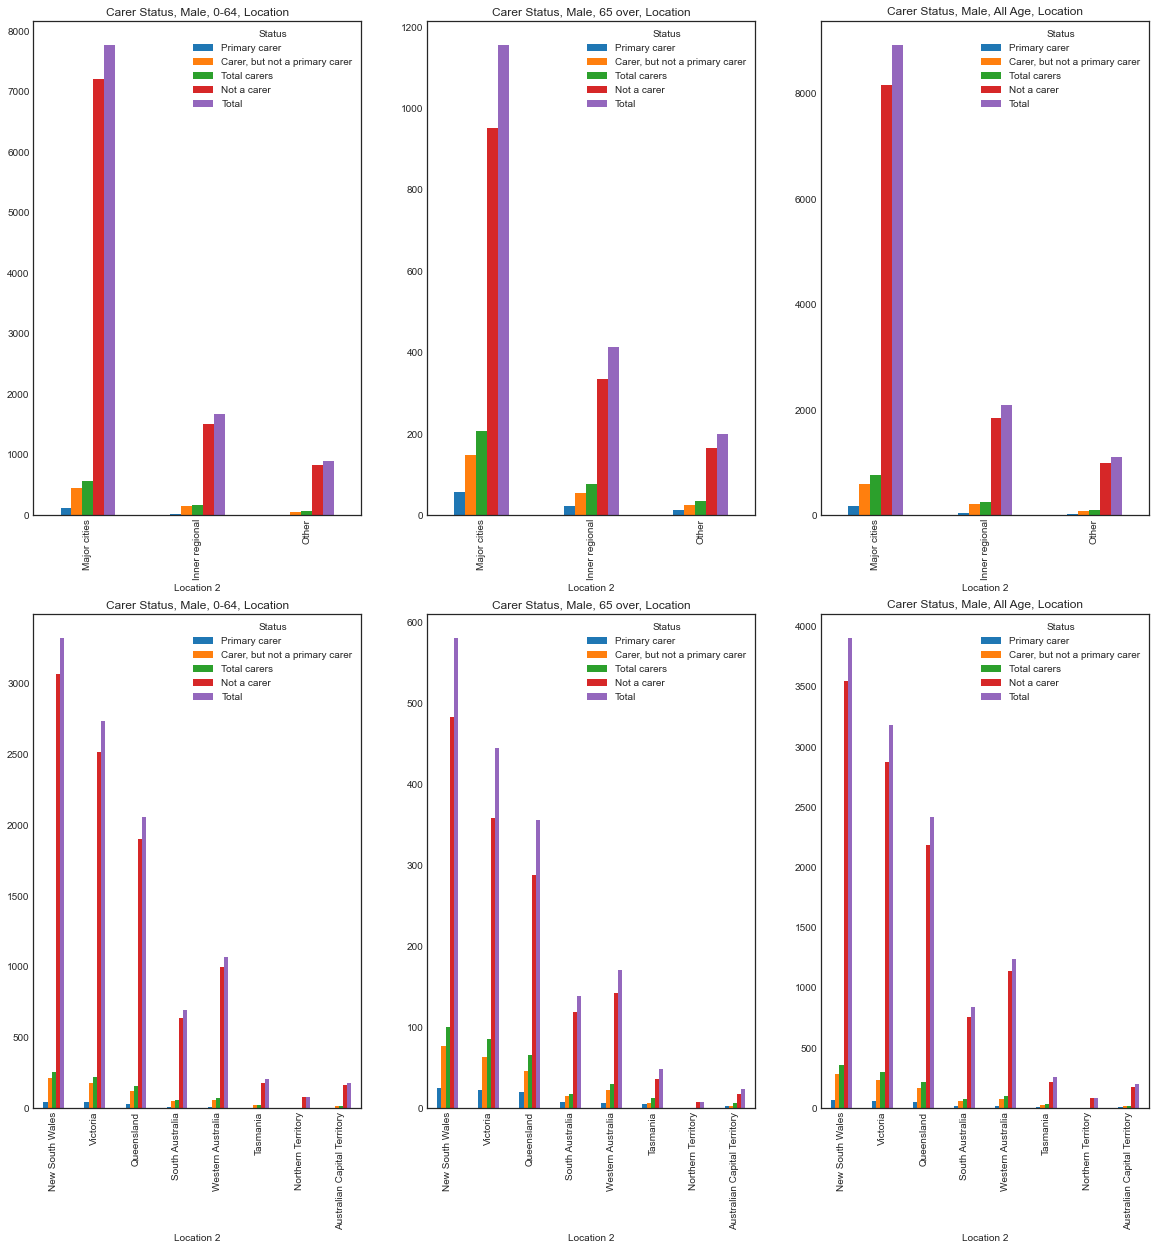

In [17]:
figure_size=(20,20)
fig, ax = plt.subplots(2, 3)
ax[0,0] = df_carer_31_4_male.plot.bar(figsize=figure_size, ax=ax[0,0], title='Carer Status, Male, 0-64, Location')
ax[0,1] = df_carer_31_5_male.plot.bar(figsize=figure_size, ax=ax[0,1], title='Carer Status, Male, 65 over, Location')
ax[0,2] = df_carer_31_6_male.plot.bar(figsize=figure_size, ax=ax[0,2], title='Carer Status, Male, All Age, Location')
ax[1,0] = df_carer_31_1_male.plot.bar(figsize=figure_size, ax=ax[1,0], title='Carer Status, Male, 0-64, Location')
ax[1,1] = df_carer_31_2_male.plot.bar(figsize=figure_size, ax=ax[1,1], title='Carer Status, Male, 65 over, Location')
ax[1,2] = df_carer_31_3_male.plot.bar(figsize=figure_size, ax=ax[1,2], title='Carer Status, Male, All Age, Location')

In [18]:
# Plot for Females - Persons aged 0-64 years
df_carer_31_1_female = df_carer_31_1.loc[('Female','State or territory of usual residence'),('Persons aged 0-64 years')]
# Plot for Females - Persons aged 65 over years
df_carer_31_2_female = df_carer_31_1.loc[('Female','State or territory of usual residence'),('Persons aged 65 years and over')]
# Plot for Females - Persons All age
df_carer_31_3_female = df_carer_31_1.loc[('Female','State or territory of usual residence'),('All persons')]
# Plot for Females - Persons aged 0-64 years
df_carer_31_4_female = df_carer_31_1.loc[('Female','Remoteness'),('Persons aged 0-64 years')]
# Plot for Females - Persons aged 65 over years
df_carer_31_5_female = df_carer_31_1.loc[('Female','Remoteness'),('Persons aged 65 years and over')]
# Plot for Females - Persons All age
df_carer_31_6_female = df_carer_31_1.loc[('Female','Remoteness'),('All persons')]

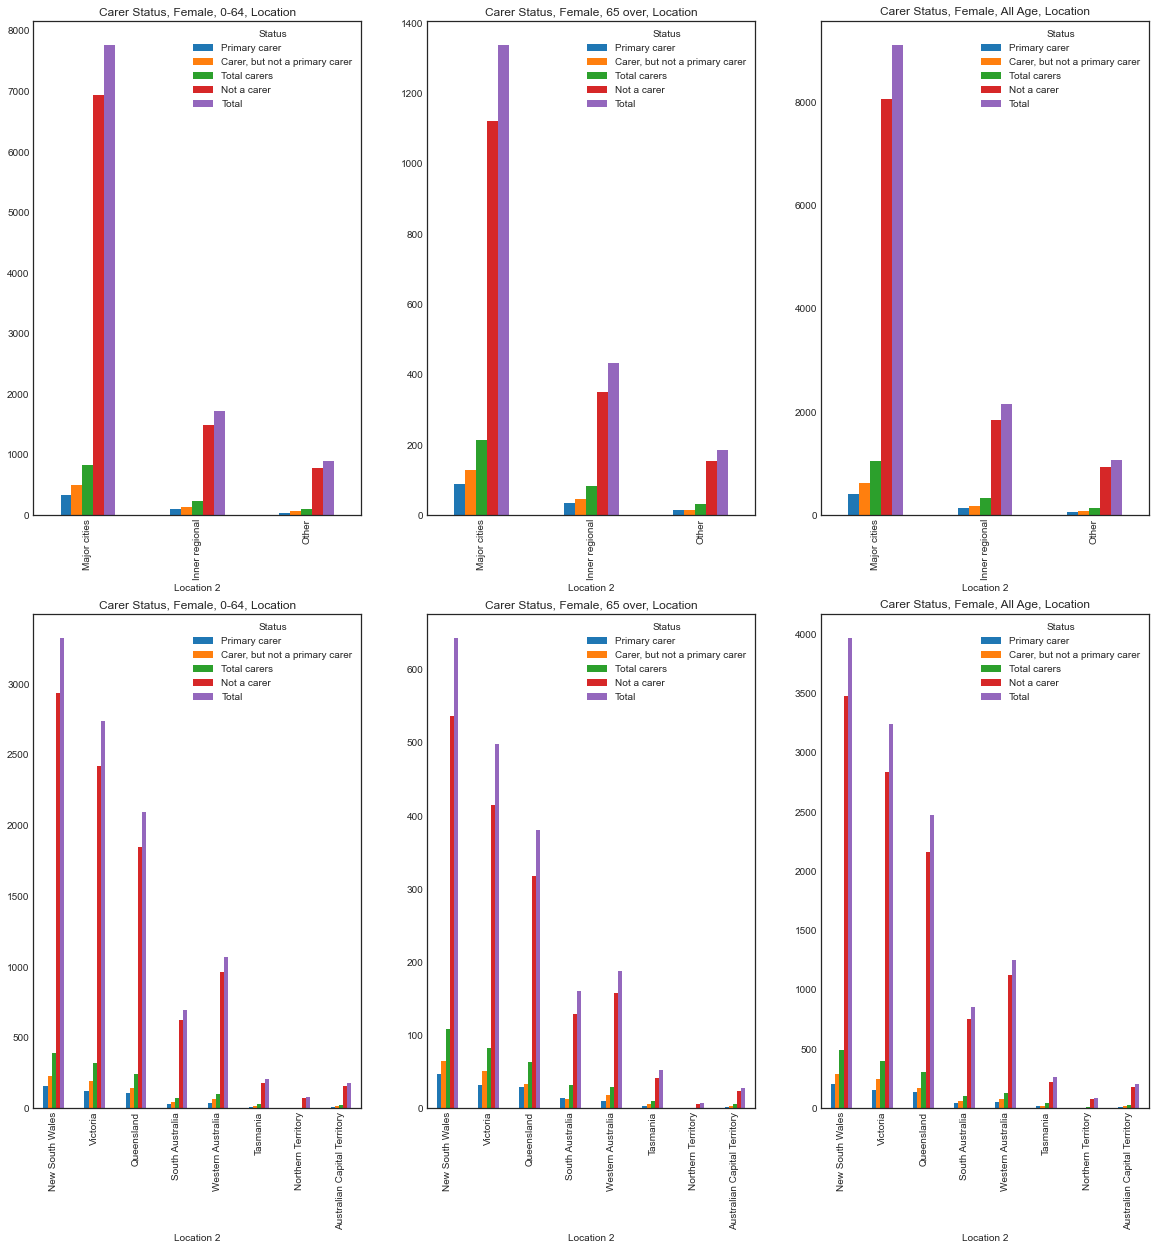

In [19]:
figure_size=(20,20)
fig, ax = plt.subplots(2, 3)
ax[0,0] = df_carer_31_4_female.plot.bar(figsize=figure_size, ax=ax[0,0], title='Carer Status, Female, 0-64, Location')
ax[0,1] = df_carer_31_5_female.plot.bar(figsize=figure_size, ax=ax[0,1], title='Carer Status, Female, 65 over, Location')
ax[0,2] = df_carer_31_6_female.plot.bar(figsize=figure_size, ax=ax[0,2], title='Carer Status, Female, All Age, Location')
ax[1,0] = df_carer_31_1_female.plot.bar(figsize=figure_size, ax=ax[1,0], title='Carer Status, Female, 0-64, Location')
ax[1,1] = df_carer_31_2_female.plot.bar(figsize=figure_size, ax=ax[1,1], title='Carer Status, Female, 65 over, Location')
ax[1,2] = df_carer_31_3_female.plot.bar(figsize=figure_size, ax=ax[1,2], title='Carer Status, Female, All Age, Location')

In [20]:
# Plot for All Persons - Persons aged 0-64 years
df_carer_31_1_all = df_carer_31_1.loc[('All persons','State or territory of usual residence'),('Persons aged 0-64 years')]
# Plot for All Persons - Persons aged 65 over years
df_carer_31_2_all = df_carer_31_1.loc[('All persons','State or territory of usual residence'),('Persons aged 65 years and over')]
# Plot for All Persons - Persons All age
df_carer_31_3_all = df_carer_31_1.loc[('All persons','State or territory of usual residence'),('All persons')]
# Plot for All Persons - Persons aged 0-64 years
df_carer_31_4_all = df_carer_31_1.loc[('All persons','Remoteness'),('Persons aged 0-64 years')]
# Plot for All Persons - Persons aged 65 over years
df_carer_31_5_all = df_carer_31_1.loc[('All persons','Remoteness'),('Persons aged 65 years and over')]
# Plot for All Persons - Persons All age
df_carer_31_6_all = df_carer_31_1.loc[('All persons','Remoteness'),('All persons')]

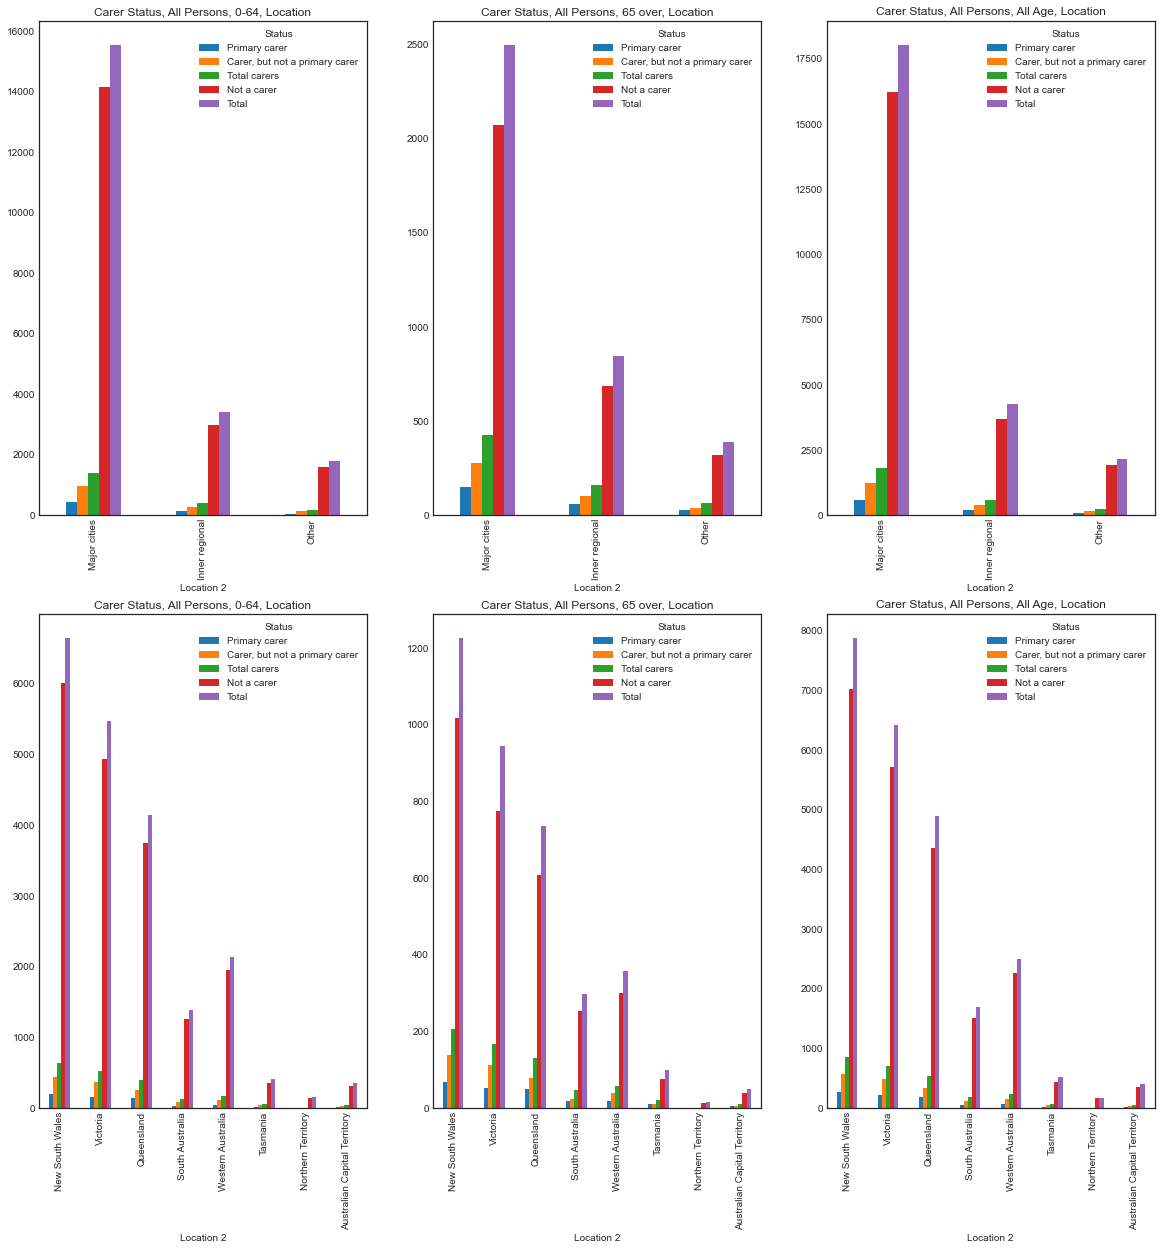

In [21]:
figure_size=(20,20)
fig, ax = plt.subplots(2, 3)
ax[0,0] = df_carer_31_4_all.plot.bar(figsize=figure_size, ax=ax[0,0], title='Carer Status, All Persons, 0-64, Location')
ax[0,1] = df_carer_31_5_all.plot.bar(figsize=figure_size, ax=ax[0,1], title='Carer Status, All Persons, 65 over, Location')
ax[0,2] = df_carer_31_6_all.plot.bar(figsize=figure_size, ax=ax[0,2], title='Carer Status, All Persons, All Age, Location')
ax[1,0] = df_carer_31_1_all.plot.bar(figsize=figure_size, ax=ax[1,0], title='Carer Status, All Persons, 0-64, Location')
ax[1,1] = df_carer_31_2_all.plot.bar(figsize=figure_size, ax=ax[1,1], title='Carer Status, All Persons, 65 over, Location')
ax[1,2] = df_carer_31_3_all.plot.bar(figsize=figure_size, ax=ax[1,2], title='Carer Status, All Persons, All Age, Location')

## 3. Export Clean Data to a CSV file

In [22]:
# # Export full version
df_carer_31_1.to_csv('Output\EPIC4_T31_1_V1.csv', index=True)